# **Welcome to Logistic Regression Handson**

In [57]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

 EDA

- -> null values
- -> duplicates values
- -> unwanted data or data columns
- -> outliers (find and remove)
- -> label encoding
- -> Feature/column selection
- -> building model


In [58]:
# Import the required dataset
df = pd.read_csv(r'D:\Intellipaat\Datasets\Bank_additional_full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [59]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [60]:
# Check for the null values for each column
df.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [61]:
# percent of null value to the whole data for each columns
df.isnull().sum()*100/len(df)

age               0.009709
job               0.012136
marital           0.012136
education         0.012136
default           0.009709
housing           0.007282
loan              0.009709
contact           0.009709
month             0.007282
day_of_week       0.007282
duration          0.007282
campaign          0.007282
pdays             0.007282
previous          0.007282
poutcome          0.012136
emp.var.rate      0.007282
cons.price.idx    0.009709
cons.conf.idx     0.007282
euribor3m         0.007282
nr.employed       0.007282
y                 0.007282
dtype: float64

In [62]:
# Drop null value
df.dropna(inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [63]:
# Check whether the null values removed or not
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [64]:
# Check for the duplicated values
df.duplicated().sum()

13

In [65]:
# Remove duplicate values
df.drop_duplicates(inplace=True)

In [66]:
# Check whether the duplicated values removed or not
df.duplicated().sum()

0

In [67]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000
mean,40.025111,258.315346,2.567890,962.465697,0.173033,0.081893,93.575749,-40.503113,3.621230,5167.029929
std,10.423948,259.302190,2.770286,186.934918,0.494975,1.570874,0.578862,4.628082,1.734463,72.257442
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


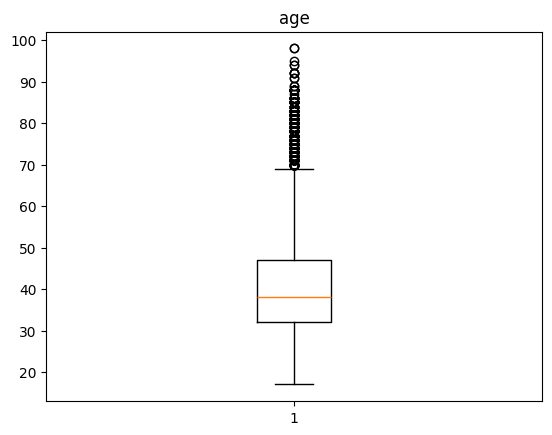

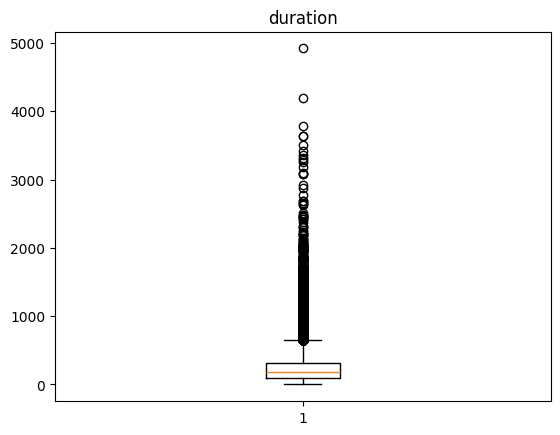

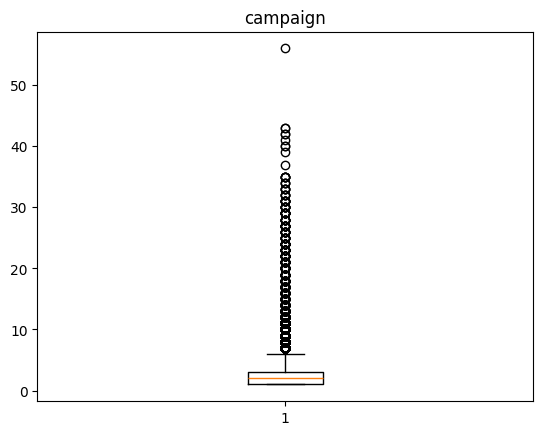

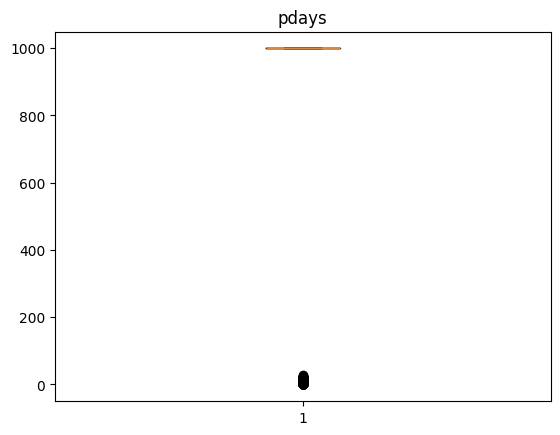

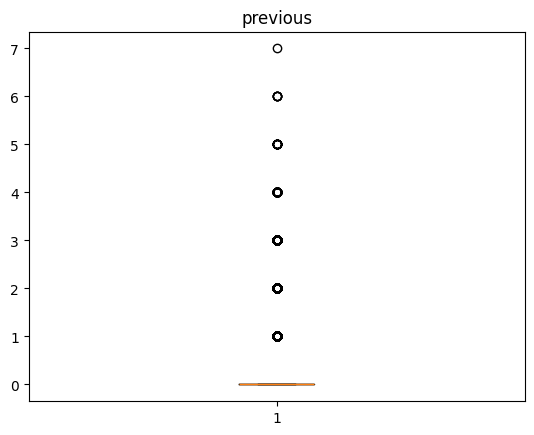

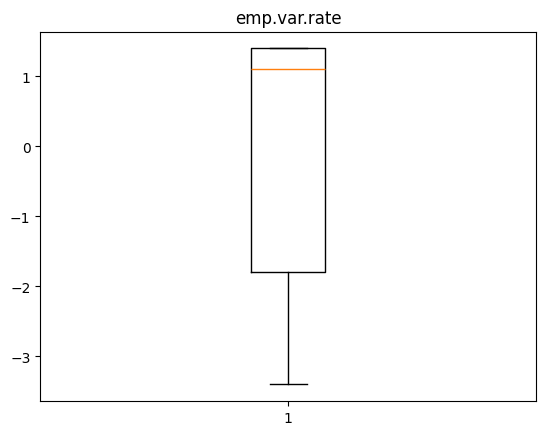

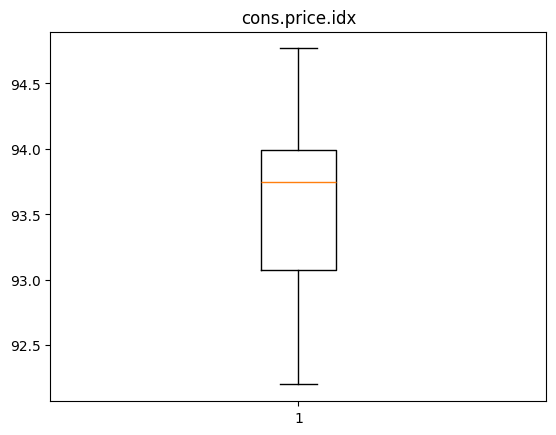

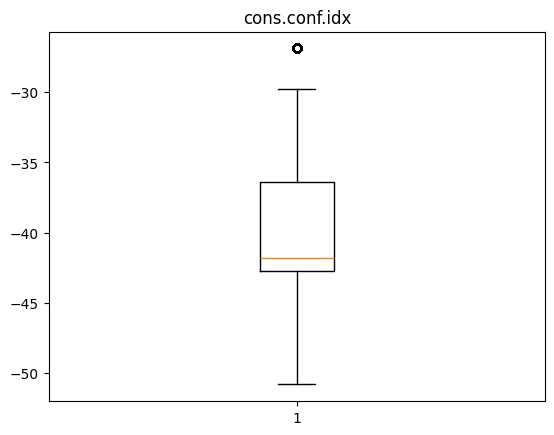

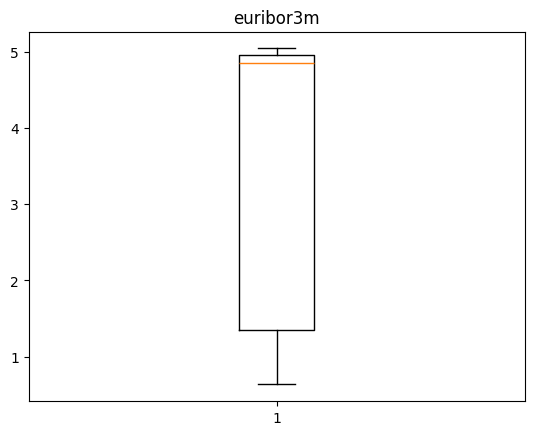

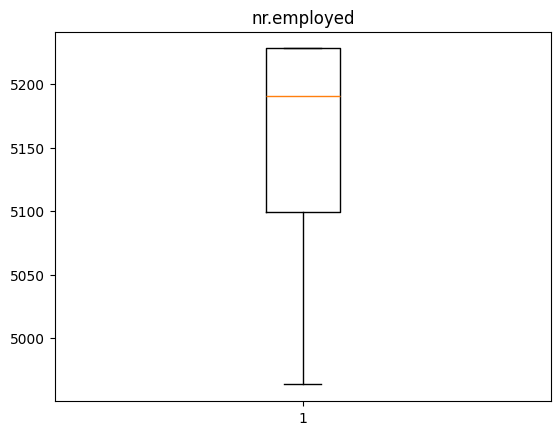

In [68]:
# Check for the outliers (box plot)
for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

Here some columns like 'previous' & 'pdays' are showing outliers but they are actually not, <br/> 
some value contains more than 90% percent of data, so the distribution takes that value as confidence interval <br/>
and other value as outliers which are not, so that column doesn't count in outliers_column.

In [69]:
# Remove the outliers (by IQR method)
outliers_column = ['age', 'duration', 'campaign', 'cons.conf.idx']

for col in outliers_column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df = df[(df[col] > lower_limit) & (df[col] < upper_limit)]

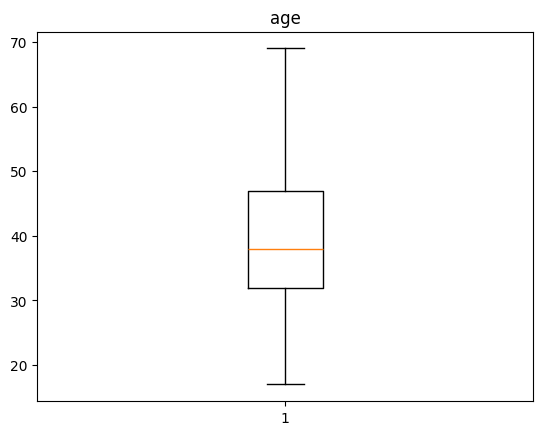

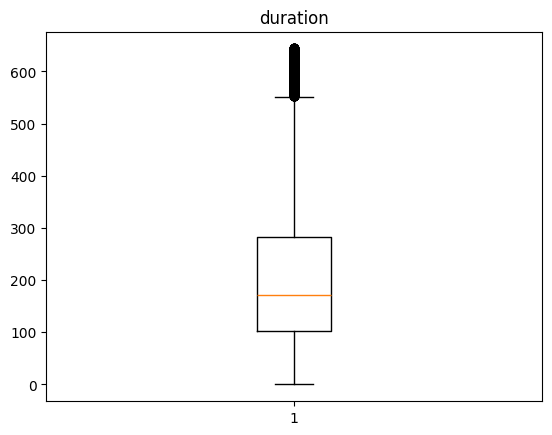

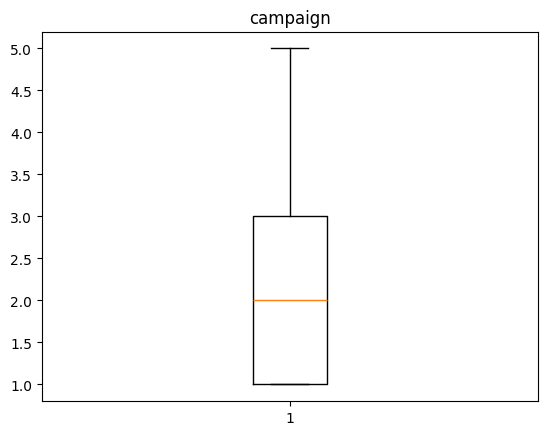

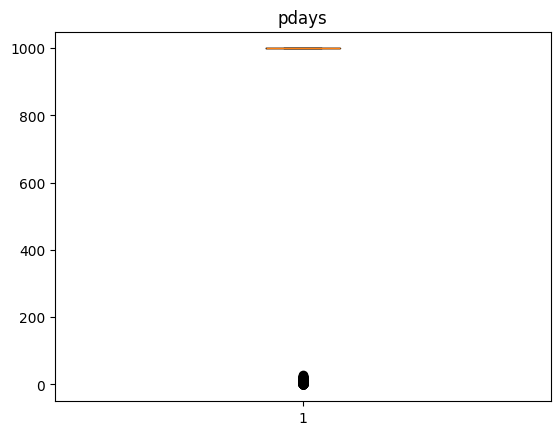

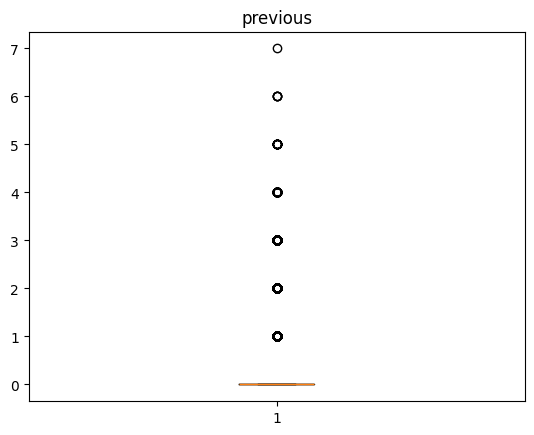

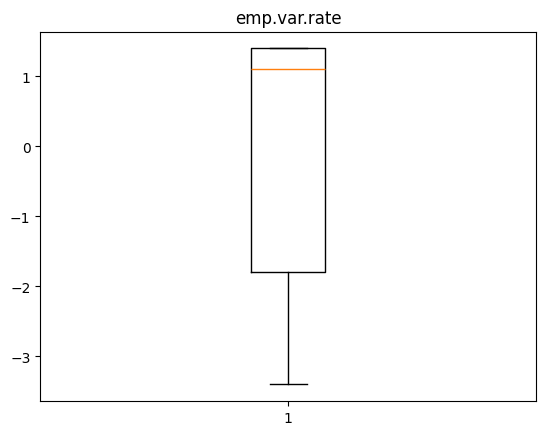

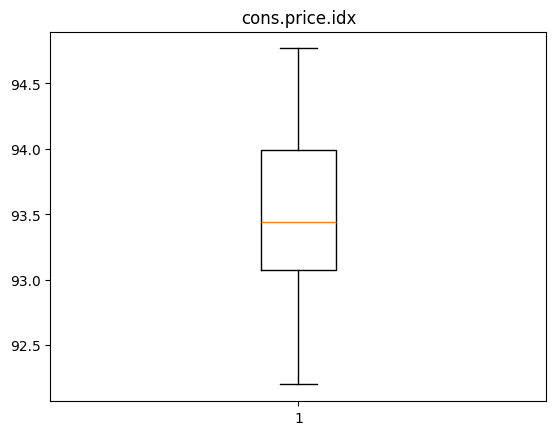

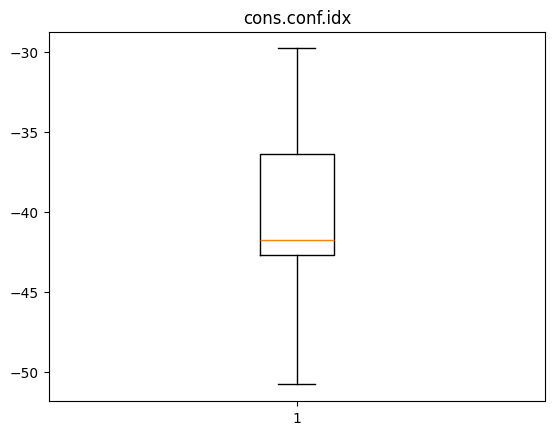

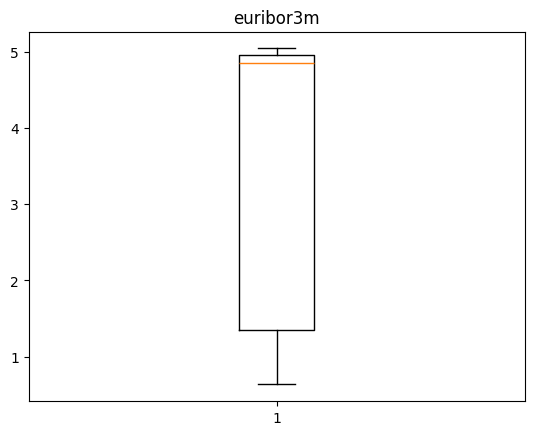

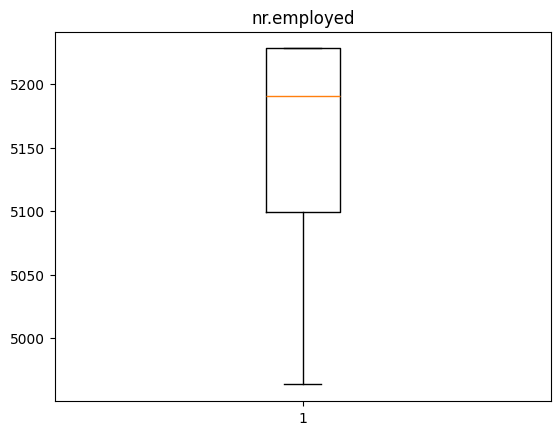

In [70]:
# Check whether the outliers removed or not
for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

In [71]:
# Check the dtype of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34266 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34266 non-null  float64
 1   job             34266 non-null  object 
 2   marital         34266 non-null  object 
 3   education       34266 non-null  object 
 4   default         34266 non-null  object 
 5   housing         34266 non-null  object 
 6   loan            34266 non-null  object 
 7   contact         34266 non-null  object 
 8   month           34266 non-null  object 
 9   day_of_week     34266 non-null  object 
 10  duration        34266 non-null  float64
 11  campaign        34266 non-null  float64
 12  pdays           34266 non-null  float64
 13  previous        34266 non-null  float64
 14  poutcome        34266 non-null  object 
 15  emp.var.rate    34266 non-null  float64
 16  cons.price.idx  34266 non-null  float64
 17  cons.conf.idx   34266 non-null  floa

In [72]:
# Import the labelEncoder class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
# Change the dtype of 'object' column as 'integer'
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
    

In [74]:
# Check the dtype of column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34266 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34266 non-null  float64
 1   job             34266 non-null  int32  
 2   marital         34266 non-null  int32  
 3   education       34266 non-null  int32  
 4   default         34266 non-null  int32  
 5   housing         34266 non-null  int32  
 6   loan            34266 non-null  int32  
 7   contact         34266 non-null  int32  
 8   month           34266 non-null  int32  
 9   day_of_week     34266 non-null  int32  
 10  duration        34266 non-null  float64
 11  campaign        34266 non-null  float64
 12  pdays           34266 non-null  float64
 13  previous        34266 non-null  float64
 14  poutcome        34266 non-null  int32  
 15  emp.var.rate    34266 non-null  float64
 16  cons.price.idx  34266 non-null  float64
 17  cons.conf.idx   34266 non-null  floa

In [75]:
# Import the variance_inflation_factor class 
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF is a measure of amount of multicollinearity in regression model.<br/> <br/>
vif < 5 :-        low correlation between independent variables (Ideal) <br/>
5 < vif > 10 :-   moderate correalation between independent variables. <br/>
vif > 10 :-       high correlation between independent variables (not tolerable) <br/>

**Step** :- <br/>
Drop the column having high VIF among all columns and keep doing same procedure till VIF comes less tha 5.

In [76]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [77]:
c = []
for col in df.columns:
    if col != 'y':
        c.append(col)

x = df[c]
vif = pd.DataFrame()
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,features,vif
0,age,22.043647
1,job,2.103309
2,marital,5.697704
3,education,4.562725
4,default,1.410572
5,housing,2.214536
6,loan,1.207756
7,contact,2.948740
8,month,6.664527
9,day_of_week,3.102966


In [78]:
df.drop(columns=['nr.employed'], inplace=True)

In [79]:
c = []
for col in df.columns:
    if col != 'y':
        c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,22.037221
1,job,2.103082
2,marital,5.696772
3,education,4.561099
4,default,1.407901
5,housing,2.214198
6,loan,1.207714
7,contact,2.447448
8,month,5.756943
9,day_of_week,3.102155


In [80]:
df.drop(columns=['cons.price.idx'], inplace=True)

In [81]:
c = []
for col in df.columns:
    if col != 'y':
        c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,20.917285
1,job,2.097668
2,marital,5.550149
3,education,4.505569
4,default,1.407862
5,housing,2.212567
6,loan,1.207113
7,contact,2.348661
8,month,5.700051
9,day_of_week,3.087572


In [82]:
df.drop(columns=['pdays'], inplace=True)

In [83]:
c = []
for col in df.columns:
    if col != 'y':
        c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,20.090471
1,job,2.094287
2,marital,5.430583
3,education,4.452290
4,default,1.407766
5,housing,2.208920
6,loan,1.206979
7,contact,2.273521
8,month,5.638341
9,day_of_week,3.074880


In [84]:
df.drop(columns=['euribor3m'], inplace=True)

In [85]:
c = []
for col in df.columns:
    if col != 'y':
        c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,17.153800
1,job,2.088276
2,marital,5.230574
3,education,4.295383
4,default,1.407397
5,housing,2.201091
6,loan,1.206782
7,contact,2.265378
8,month,5.243584
9,day_of_week,3.034531


In [86]:
df.drop(columns=['cons.conf.idx'], inplace=True)

In [87]:
c = []
for col in df.columns:
    if col != 'y':
        c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,11.091595
1,job,2.079079
2,marital,4.382434
3,education,4.199435
4,default,1.406387
5,housing,2.165235
6,loan,1.203635
7,contact,2.241132
8,month,4.853266
9,day_of_week,2.971738


In [88]:
df.drop(columns=['age'], inplace=True)

In [89]:
c = []
for col in df.columns:
    if col != 'y':
        c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,job,2.056395
1,marital,4.361318
2,education,4.024104
3,default,1.322201
4,housing,2.116347
5,loan,1.200478
6,contact,2.239629
7,month,4.598642
8,day_of_week,2.891238
9,duration,3.014379


In [90]:
df.drop(columns=['poutcome'], inplace=True)

In [91]:
c = []
for col in df.columns:
    if col != 'y':
        c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,job,2.037742
1,marital,4.152575
2,education,3.808516
3,default,1.313232
4,housing,2.086122
5,loan,1.198514
6,contact,2.223255
7,month,4.490531
8,day_of_week,2.809274
9,duration,2.865149


Here we see all columns vif came below 5, so these are our final columns.

In [92]:
# Check whether the target variable is balanced or not 
df['y'].value_counts()

y
0    31575
1     2691
Name: count, dtype: int64

In [93]:
# # create data frame for independent variables & dependent variables

X = pd.DataFrame(x)             # Independent variable
y = pd.DataFrame(df['y'])       # Dependent variable
X.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1


In [94]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [95]:
# Import the train test split function, get train & test data from it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [96]:
# Check whether the shape of both train & test data are equal or not
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27412, 13)
(6854, 13)
(27412, 1)
(6854, 1)


In [97]:
# import standard scaler class 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [98]:
# Transform using standard scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [99]:
# import the logistics regression class
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()        # insatnce of LR class

In [100]:
# Training the model / fitting the model
model.fit(X_train, y_train)

LogisticRegression()

In [101]:
# Intercept
model.intercept_        # Beta 0

array([-3.81259251])

In [102]:
# Coefficient
model.coef_             # Beta 1, 2, 3, ...

array([[ 0.03312135,  0.07360243,  0.2986123 , -0.38980801,  0.01002672,
        -0.00922799, -0.03472175, -0.11260125,  0.08950879,  0.99118298,
        -0.084924  ,  0.27536516, -1.19113417]])

In [103]:
# Get the y_predicted and convert it in df
y_predicted = model.predict(X_test)
y_predicted = pd.DataFrame(y_predicted, columns=['y_pred'])
y_predicted

,y_pred
0,0
1,0
2,1
3,0
4,0
...,...
6849,0
6850,0
6851,0
6852,0


In [104]:
# Editing the dataframe of actual_y
y_test.rename(columns={'y' : 'y-actual'}, inplace=True)         # Rename y : y_actual
y_test.reset_index(inplace=True)                                # reset index to start from 0
y_test.drop(columns=['index'], inplace=True)                    # Remove 'index' column created by reset index
y_test

,y-actual
0,0
1,0
2,0
3,0
4,0
...,...
6849,0
6850,0
6851,0
6852,0


In [105]:
# concatenate y_actual & y_predicted to analyze(see) the difference (between both) manually
pd.concat([y_predicted, y_test], axis=1)

,y_pred,y-actual
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
6849,0,0
6850,0,0
6851,0,0
6852,0,0


In [106]:
# import required metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [107]:
# Accuracy score of model
acc = accuracy_score(y_test, y_predicted)
print("Accuracy :-", round(acc*100, 2))

Accuracy :- 92.44


In [108]:
# Precision score of model
precision_score(y_test,y_predicted)

0.519650655021834

In [109]:
# Recall score / sensitivity of model
recall_score(y_test, y_predicted)

0.22580645161290322

In [110]:
# F1 score of model
f1_score(y_test, y_predicted) 

0.3148148148148148

In [111]:
# Confusion matrix
cfm = confusion_matrix(y_test, y_predicted)
TN, FP, FN, TP = cfm.ravel()
print('True Negative  :-', TN)
print('False Postive  :-', FP)
print('False Negative :-', FN)
print('True Postive   :-', TP)

True Negative  :- 6217
False Postive  :- 110
False Negative :- 408
True Postive   :- 119


<Axes: >

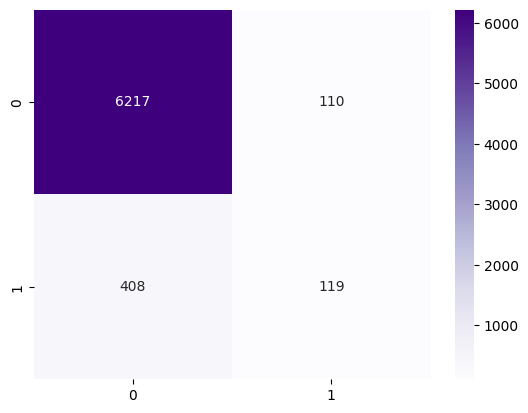

In [112]:
# Display the visual of confusion matrix
sns.heatmap(cfm, annot=True, fmt='d', cmap='Purples')

END

---